<a href="https://colab.research.google.com/github/May-Xiaoting-Zhou/MX-Project/blob/main/code/MX_2_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

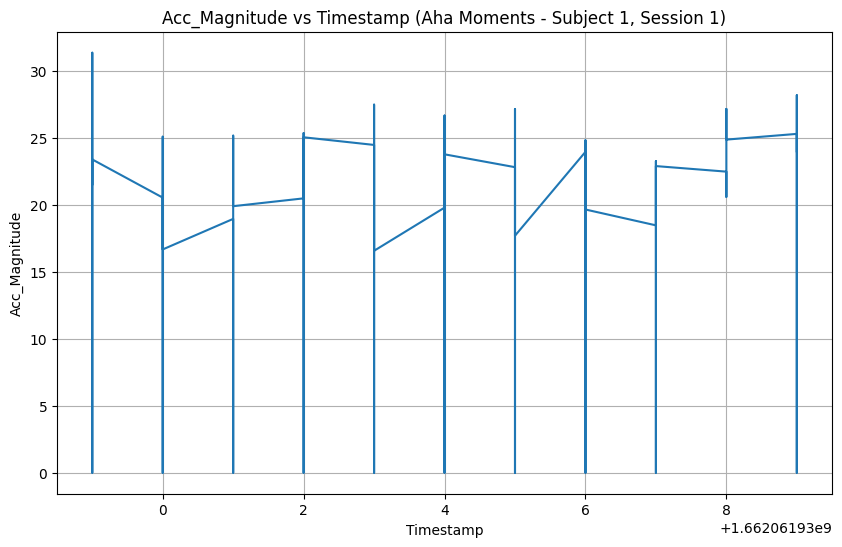

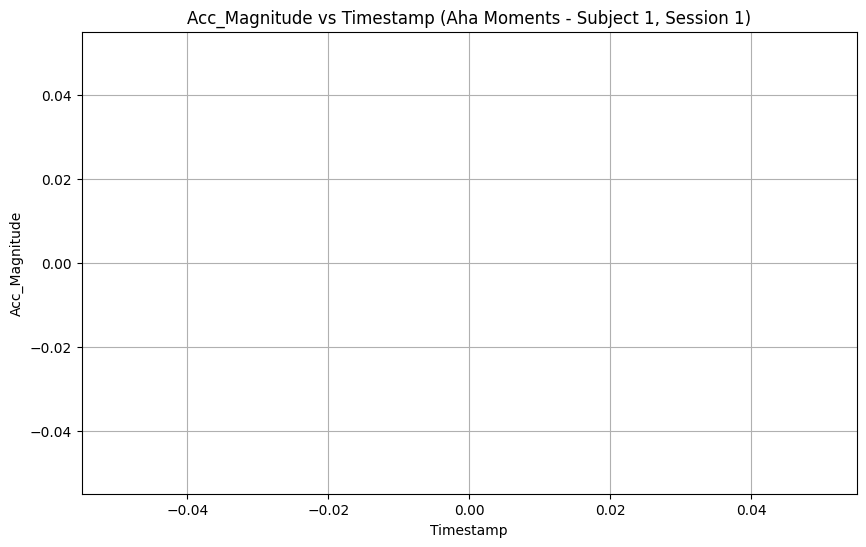

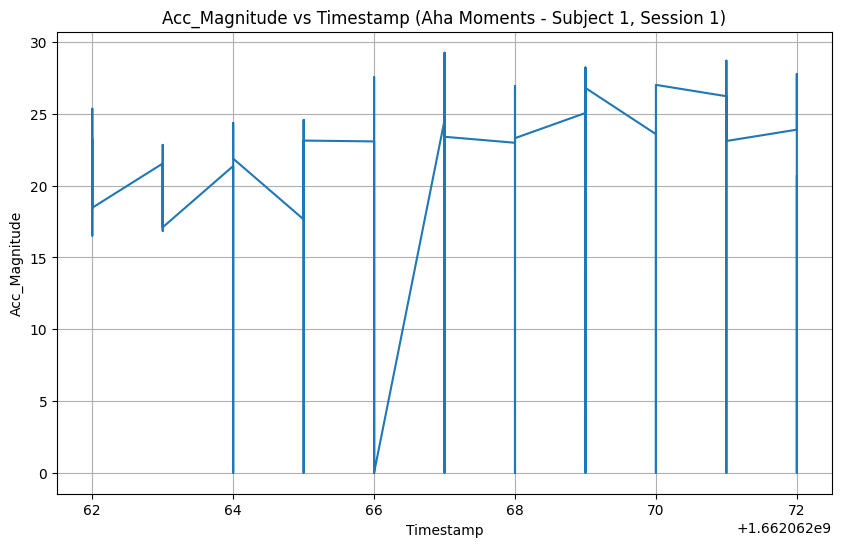

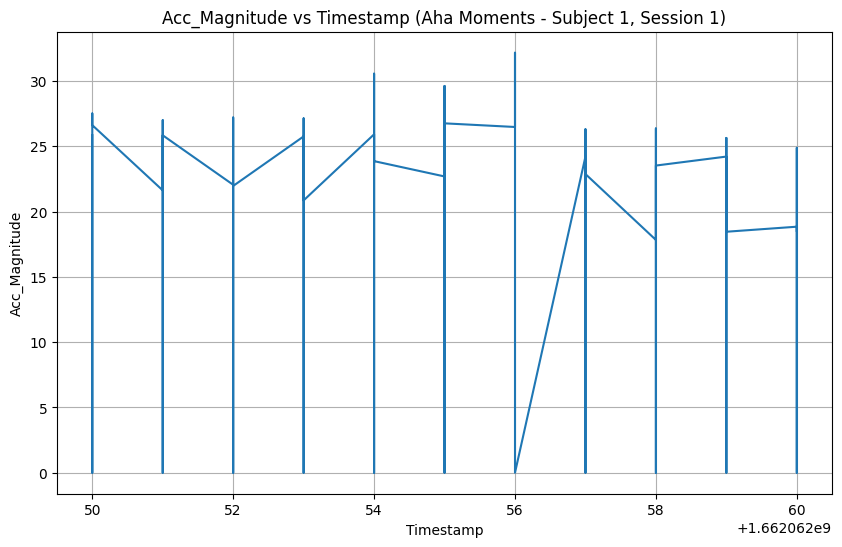

In [ ]:
project_dir = "/content/drive/MyDrive/EXPERIMENT_DATA"
for subject in range(1, 2):
  for session in range(1, 2):
      # df_acc = pd.read_csv(f"{project_dir}/Subject_{subject}/Subject_{subject}_Session_{session}_Preprocessed_Aha_Acc.csv")
      # df_bvp = pd.read_csv(f"{project_dir}/Subject_{subject}/Subject_{subject}_Session_{session}_Preprocessed_Aha_Bvp.csv")
      # df_gsr = pd.read_csv(f"{project_dir}/Subject_{subject}/Subject_{subject}_Session_{session}_Preprocessed_Aha_Gsr.csv")
      # df_temp = pd.read_csv(f"{project_dir}/Subject_{subject}/Subject_{subject}_Session_{session}_Preprocessed_Aha_Temp.csv")
      df_pupil = pd.read_csv(f"{project_dir}/Subject_{subject}/Subject_{subject}_Session_{session}_Preprocessed_Aha_Pupil.csv")

      df_matrix_label = pd.read_csv(f'{project_dir}/Subject_{subject}/Subject_{subject}_Session_{session}_matrix_label.csv')

      df_pupil['timestamp'] = df_pupil['timestamp'] + (df_matrix_label['time_from'].iloc[0] - df_pupil['timestamp'].iloc[0])


      for index, row in df_matrix_label.iterrows():
        label_time_from = row['label_time_from']
        label_time_to = row['label_time_to']

        df_pupil.loc[(df_pupil['timestamp'] >= label_time_from) & (df_pupil['timestamp'] <= label_time_to), 'Aha'] = 1
        df = df_pupil.loc[(df_pupil['timestamp'] >= label_time_from) & (df_pupil['timestamp'] <= label_time_to)]

        # Plotting
        aha_moments = df
        plt.figure(figsize=(10, 6))
        plt.plot(aha_moments['timestamp'], aha_moments['diameter'])
        plt.xlabel('Timestamp')
        plt.ylabel('Acc_Magnitude')
        plt.title(f'Acc_Magnitude vs Timestamp (Aha Moments - Subject {subject}, Session {session})')
        plt.grid(True)
        plt.show()


In [ ]:
df_pupil

,subject,session,diameter,timestamp,diameter_3d
0,1,1,21.516000000,1662061929,60.342000000
1,1,1,23.853000000,1662061929,100.732000000
2,1,1,0.000000000,1662061929,0.000000000
3,1,1,22.845000000,1662061929,56.970000000
4,1,1,26.017000000,1662061929,103.406000000
...,...,...,...,...,...
42508,1,1,24.916000000,1662062370,126.397000000
42509,1,1,25.785000000,1662062370,125.859000000
42510,1,1,18.977000000,1662062370,142.684000000
42511,1,1,23.815000000,1662062370,125.940000000


In [ ]:

df_matrix_label

,subject,session,PUZZLE,count_X,time_from,time_to,label_time_from,label_time_to
0,1,1,1,3,1662061929,1662061941,1662061929,1662061939
1,1,1,1,9,1662061909,1662061928,1662061916,1662061926
2,1,1,2,2,1662062063,1662062074,1662062062,1662062072
3,1,1,2,5,1662062033,1662062062,1662062050,1662062060


In [ ]:
import glob
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pytz
import warnings

warnings.filterwarnings('ignore')
# Set display options for pandas
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.9f' % x)


In [ ]:
def convert_unix_to_chicago(unix_timestamp):
    dt = datetime.utcfromtimestamp(unix_timestamp)
    chicago_tz = pytz.timezone('America/Chicago')
    dt_localized = pytz.utc.localize(dt).astimezone(chicago_tz)
    is_dst = dt_localized.dst() != timedelta(0)
    time_zone = 'CDT' if is_dst else 'CST'
    dt_chicago = dt_localized.strftime('%Y-%m-%d %H:%M:%S')
    return dt_localized, time_zone

In [ ]:
def convert_chicago_to_unix(given_datetime):
  timezone = pytz.timezone('America/Chicago')

  # Localize the datetime to the given timezone
  localized_datetime = timezone.localize(given_datetime)

  # Convert to Unix timestamp
  unix_timestamp = int(localized_datetime.timestamp())

  return unix_timestamp


# OSHA

In [ ]:
osha_path = '/content/drive/MyDrive/MX_2/OSHA'

In [ ]:
for sub in range(1, 81):
  try:
    df_finish = pd.read_csv(osha_path + f'/Subject_{sub}_OSHA/FinishList.csv')
    df_finish['finishClick_count_hms'] = df_finish['finishClick'].apply(lambda x: x.count(':'))
    df_finish['finishClick_count_ymd'] = df_finish['finishClick'].apply(lambda x: x.count('-'))
    df_finish['finishConfirm_count_hms'] = df_finish['finishConfirm'].apply(lambda x: x.count(':'))
    df_finish['finishConfirm_count_ymd'] = df_finish['finishConfirm'].apply(lambda x: x.count('-'))
    df_finish.to_csv(osha_path + f'/Subject_{sub}_OSHA/OSHA_FinishList.csv', index=False)

    df_object = pd.read_csv(osha_path + f'/Subject_{sub}_OSHA/ObjectList.csv')
    df_object = df_object.drop(columns=['ObjectName', 'Cordinates_X',	'Cordinates_Y',	'Cordinates_Z',	'Reference'])
    df_object.to_csv(osha_path + f'/Subject_{sub}_OSHA/OSHA_ObjectList.csv', index=False)

  except FileNotFoundError:
    pass

In [ ]:
for sub in range(1, 81):
  try:
    df_object = pd.read_csv(osha_path + f'/Subject_{sub}_OSHA/OSHA_ObjectList.csv')
    df = pd.read_csv(osha_path + f"/Subject_{sub}_OSHA/OSHA_FinishList.csv")

    # Use .any() or .all() to check if any or all values in the Series meet the condition
    if (df['finishClick_count_hms'] == 2).any() and (df['finishClick_count_ymd'] == 0).any():
      # Use .loc to conditionally modify values in the 'finishClick' column
      df.loc[(df['finishClick_count_hms'] == 2) & (df['finishClick_count_ymd'] == 0), 'finishClick'] = \
          df_object['TagHandMenuPumpTime'][0][:15] + ' ' + df.loc[(df['finishClick_count_hms'] == 2) & (df['finishClick_count_ymd'] == 0), 'finishClick']

    if (df['finishClick_count_hms'] == 1).any() and (df['finishClick_count_ymd'] == 0).any():
      df.loc[(df['finishClick_count_hms'] == 1) & (df['finishClick_count_ymd'] == 0), 'finishClick'] = \
          df_object['TagHandMenuPumpTime'][0][:18] + ' ' + df.loc[(df['finishClick_count_hms'] == 1) & (df['finishClick_count_ymd'] == 0), 'finishClick']

    # Use .any() or .all() to check if any or all values in the Series meet the condition
    if (df['finishConfirm_count_hms'] == 2).any() and (df['finishConfirm_count_ymd'] == 0).any():
      # Use .loc to conditionally modify values in the 'finishConfirm' column
      df.loc[(df['finishConfirm_count_hms'] == 2) & (df['finishConfirm_count_ymd'] == 0), 'finishConfirm'] = \
          df_object['TagHandMenuPumpTime'][0][:15] + ' ' + df.loc[(df['finishConfirm_count_hms'] == 2) & (df['finishConfirm_count_ymd'] == 0), 'finishConfirm']

    if (df['finishConfirm_count_hms'] == 1).any() and (df['finishConfirm_count_ymd'] == 0).any():
      df.loc[(df['finishConfirm_count_hms'] == 1) & (df['finishConfirm_count_ymd'] == 0), 'finishConfirm'] = \
          df_object['TagHandMenuPumpTime'][0][:18] + ' ' + df.loc[(df['finishConfirm_count_hms'] == 1) & (df['finishConfirm_count_ymd'] == 0), 'finishConfirm']


    # df_object['TagHandMenuPumpTime'][0][:15] #2, 0
    # df_object['TagHandMenuPumpTime'][0][:18] #1, 0
    df.to_csv(osha_path + f'/Subject_{sub}_OSHA/OSHA_FinishList_Updated.csv', index=False)
  except FileNotFoundError:
    pass

In [ ]:
for sub in range(37, 81):
  try:
    df_object = pd.read_csv(osha_path + f'/Subject_{sub}_OSHA/OSHA_ObjectList.csv')
    df = pd.read_csv(osha_path + f"/Subject_{sub}_OSHA/OSHA_FinishList_Updated.csv")
    df = df[df['SectionNum'] != 'SceneStartTime']
    df = df[df['SectionNum'] != 'TimeUpEnd']

    df['finishClick'] = df['finishClick'].str.replace(': ', ':')
    df['finishClick'] = df['finishClick'].str.replace(' - ', '-')
    df['finishClick'] = pd.to_datetime(df['finishClick'], format="%Y-%m-%d %H:%M:%S.%f") # '%m/%d/%Y %H:%M'
    df['finishClick'] = df['finishClick'].apply(lambda x: convert_chicago_to_unix(x))

    df['finishConfirm'] = df['finishConfirm'].str.replace(': ', ':')
    df['finishConfirm'] = df['finishConfirm'].str.replace(' - ', '-')
    df['finishConfirm'] = pd.to_datetime(df['finishConfirm'], format="%Y-%m-%d %H:%M:%S.%f")
    df['finishConfirm'] = df['finishConfirm'].apply(lambda x: convert_chicago_to_unix(x))

    # Create a sample DataFrame
    col_names = ['TagHandMenuPumpTime', 'TagClickTime',
          'TaggingTime', 'DetagHandMenuPumpTime', 'DetagClickTime',
          'DetaggingTime', 'BTButtonPressTime', 'BTTaggingTime']

    for col_name in col_names:
      # Check if the 'col_name' column has any non-NaN values
      for index, row in df_object.iterrows():
        if not pd.isna(row[col_name]) and not pd.isna(row[col_name]) == 'NaT':
          # Replace all occurrences of ': ' with ':' in the 'col_name' column
          row[col_name] = row[col_name].replace(': ', ':')

          # Replace all occurrences of ' - ' with '-' in the 'col_name' column
          row[col_name] = row[col_name].replace(' - ', '-')

          # Convert the 'col_name' column to datetime objects
          row[col_name] = pd.to_datetime(row[col_name], format="%Y-%m-%d %H:%M:%S.%f")

          # given_datetime = datetime.strptime(row[col_name], "%Y-%m-%d %H:%M:%S.%f")
          timestamp = convert_chicago_to_unix(row[col_name])

          # timestamp = int(pd.to_datetime(row[col_name]).timestamp())
          df_object.loc[index, col_name] = timestamp
    df.to_csv(osha_path + f'/Subject_{sub}_OSHA/OSHA_FinishList_Timestamp.csv', index=False)
    df_object.to_csv(osha_path + f'/Subject_{sub}_OSHA/OSHA_ObjectList_Timestamp.csv', index=False)
  except FileNotFoundError:
    pass

In [ ]:
def read_osha_object_data(sub, fold='Exam'):
  try:
    file_path = osha_path + f"/Subject_{sub}_OSHA/OSHA_ObjectList_Timestamp.csv"
    df = pd.read_csv(file_path)
    return df
  except FileNotFoundError:
    print(f"Function: read_osha_object_data. No file found for Subject_{sub} Fold_{fold}")
    return None

In [ ]:
def read_osha_finish_data(sub, fold='Exam'):
  try:
    file_path = osha_path + f"/Subject_{sub}_OSHA/OSHA_FinishList_Timestamp.csv"
    df = pd.read_csv(file_path)
    return df
  except FileNotFoundError:
    print(f"Function: read_osha_finish_data. No file found for Subject_{sub} Fold_{fold}")
    return None

# EEG

In [ ]:
eeg_path = f'/content/drive/MyDrive/MX_2/EEG'

In [ ]:
# separate eeg header Time\tFP1\tFP2\tC3\tC4\tP7\tP8\tO1\tO2\tF7\tF8\tF3\tF4\tT7\tT8\tP3\tP4
def convert_processed_csv(path):
  try:
    df = pd.read_csv(path)
    df[['Time', 'FP1', 'FP2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'F3', 'F4', 'T7', 'T8', 'P3', 'P4']] = df['Time\tFP1\tFP2\tC3\tC4\tP7\tP8\tO1\tO2\tF7\tF8\tF3\tF4\tT7\tT8\tP3\tP4'].str.split('\t', expand=True)
    df = df.drop(df.columns[0], axis=1)
    df.to_csv(path, index=False)
  except FileNotFoundError:
    pass
  except KeyError:
    pass

In [ ]:
def read_eeg_processed_data(sub, fold):
  try:
    file_path = eeg_path + f"/2_Processed_After_EEGLab/Raw_Processed/{fold}/Subject_{sub}_EEG_{fold}_OpenBCI_Processed.csv"
    df = pd.read_csv(file_path)

    return df
  except FileNotFoundError:
    print(f"Function: read_eeg_processed_data. No file found for Subject_{sub} Fold_{fold}")
    return None


In [ ]:
def read_eeg_raw_data(sub, fold='Exam'):
  try:
    file_path = eeg_path + f"/0_Raw/{fold}/Subject_{sub}_EEG_{fold}_Raw.csv"
    df = pd.read_csv(file_path)

    return df
  except FileNotFoundError:
    print(f"Function: read_eeg_raw_data. No file found for Subject_{sub} Fold_{fold}")
    return None

In [ ]:
def read_eeg_raw_timestamp_data(sub, fold='Exam'):
  try:
    file_path = eeg_path + f"/0_Raw/{fold}/Subject_{sub}_EEG_{fold}_Raw_Timestamp.csv"
    df = pd.read_csv(file_path)

    return df
  except FileNotFoundError:
    print(f"Function: read_eeg_raw_timestamp_data. No file found for Subject_{sub} Fold_{fold}")
    return None

In [ ]:
def read_eeg_group_mean_data(sub, fold='Exam'):
  try:
    file_path = eeg_path + f"/3_Features/{fold}/Subject_{sub}_EEG_{fold}_Group_Mean.csv"
    df = pd.read_csv(file_path)

    return df
  except FileNotFoundError:
    print(f"Function: read_eeg_group_mean_data. No file found for Subject_{sub} Fold_{fold}")
    return None

In [ ]:
for sub in range(46, 62):
  for fold in ['Exam']: #['Baseline', 'Training', 'Exam']:
    df = read_eeg_processed_data(sub, fold)
    if df is None:
      continue

    print('sub=', sub, ' fold=', fold, len(df.columns))
    if len(df.columns) == 1:
      file_path =  eeg_path + f"/2_Processed_After_EEGLab/Raw_Processed/{fold}/Subject_{sub}_EEG_{fold}_OpenBCI_Processed.csv"
      convert_processed_csv(file_path)
    elif len(df.columns) == 17:
      print('17:', df.columns)
    elif len(df.columns) == 19:
      print('19:', df.columns)
    else:
      print('Other:', len(df.columns), df.columns)


In [ ]:
# unix_timestamp, Timestamp	Timestamp (Formatted)	Subject	Timestamp (Formatted)_Unix
for sub in range(46, 62): #62
  fold = 'Exam'
  df_processed = read_eeg_processed_data(sub, 'Exam')
  df_raw = read_eeg_raw_data(sub, 'Exam')


  # Check if both dataframes are loaded successfully and are not empty before proceeding
  if df_raw is not None and df_processed is not None and not df_raw.empty and not df_processed.empty:
    if len(df_raw) + 1 == len(df_processed):
      df = df_processed.iloc[1:]
      df.reset_index(drop=True, inplace=True)
      df_raw.columns = df_raw.columns.str.strip()
      print(len(df_raw), len(df))

      df['Timestamp'] = df_raw['Timestamp']
      df['Timestamp (Formatted)'] = df_raw['Timestamp (Formatted)']

      df.to_csv(eeg_path + f"/0_Raw/{fold}/Subject_{sub}_EEG_{fold}_Raw_Timestamp.csv", index=False)
    else:
      print(f"No data match: Length mismatch - Raw: {len(df_raw)}, Processed: {len(df_processed)}")
  else:
    print(f"No data match: One or both dataframes are None or empty for Subject {sub}, Fold {fold}")

In [ ]:
# unix_timestamp, Timestamp	Timestamp (Formatted)	Subject	Timestamp (Formatted)_Unix
for sub in range(46, 62):
  fold='Exam'
  df_eeg = read_eeg_raw_timestamp_data(sub, fold)

  if df_eeg is not None and not df_eeg.empty:
    df_eeg['Timestamp'] = df_eeg['Timestamp'].astype(int)

    columns_to_keep = ['FP1', 'FP2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'F3', 'F4', 'T7', 'T8', 'P3', 'P4', 'Timestamp']
    df_eeg = df_eeg[columns_to_keep]

    # Group by 'Timestamp' and calculate the mean for each column
    grouped_df = df_eeg.groupby('Timestamp').mean()
    # Convert the grouped_df back to a DataFrame
    df_eeg = grouped_df.reset_index()

    df_eeg.to_csv(eeg_path + f"/3_Features/{fold}/Subject_{sub}_EEG_{fold}_Group_Mean.csv", index=False)
  else:
    print(f"No data match", sub)

No file found for Subject_51 Fold_Exam
No data match 51
No file found for Subject_52 Fold_Exam
No data match 52
No file found for Subject_54 Fold_Exam
No data match 54
No file found for Subject_55 Fold_Exam
No data match 55
No file found for Subject_58 Fold_Exam
No data match 58
No file found for Subject_59 Fold_Exam
No data match 59
No file found for Subject_60 Fold_Exam
No data match 60


# Empatica

In [ ]:
empatica_path = f'/content/drive/MyDrive/MX_2/Empatica'

In [ ]:
def read_empatica_processed_data(sub, fold):
  try:
    file_path = empatica_path + f"/{fold}/Subject_{sub}_Empatica_{fold}/Subject_{sub}_Empatica_Merged.csv"
    df = pd.read_csv(file_path)

    return df
  except FileNotFoundError:
    print(f"Function: read_empatica_processed_data. No file found for Subject_{sub} Fold_{fold}")
    return None

# Empatica + EEG

In [ ]:
all_path = '/content/drive/MyDrive/MX_2/All_Signals'

In [ ]:
fold='Exam'
for sub in range(1, 82):
  df_empatica = read_empatica_processed_data(sub, fold)
  df_eeg = read_eeg_group_mean_data(sub, fold)

  if df_eeg is not None and not df_eeg.empty and df_empatica is not None and not df_empatica.empty:
    df_empatica = df_empatica.rename(columns={'unix_timestamp': 'Timestamp'})
    # Merge the two dataframes
    merged_df = pd.merge(df_empatica, df_eeg, on='Timestamp', how='inner')
    # Display the merged dataframe
    merged_df.to_csv(all_path + f"/{fold}/Subject_{sub}_Empatica_EEG_{fold}_Merged.csv", index=False)

In [ ]:
def read_empatica_eeg_data(sub, fold='Exam'):
  try:
    file_path = all_path + f"/{fold}/Subject_{sub}_Empatica_EEG_{fold}_Merged.csv"
    df = pd.read_csv(file_path)

    return df
  except FileNotFoundError:
    print(f"No file found for Subject_{sub} Fold_{fold}")
    return None

## Set Label

### Aha! Moment:

1.   Aha! Moment: Label = 1
  *   OSHA_ObjectList
  *   [TagHandMenuPumpTime] - 13 to [TagHandMenuPumpTime] - 3
  *   [TagHandMenuPumpTime] - 10 to [TagHandMenuPumpTime] - 3
  *   [TagHandMenuPumpTime] - 10 to [TagHandMenuPumpTime] - 0
2.   Impasse: Label = 2
  *   OSHA_FinishList
  *   Selection = A
  *   [finishClick] - 13 to [finishClick] - 3
  *   [finishClick] - 10 to [finishClick] - 3
  *   [finishClick] - 10 to [finishClick] - 0



In [ ]:
def initial_label(df, label=-1):
  if df is not None and not df.empty:
    df['Label'] = label
  return df

In [ ]:
def set_label(df, df_osha, col_name, label=-1, time_from=-13, time_to=-3):
  if df is not None and not df.empty and df_osha is not None and not df_osha.empty:
    for index, row in df_osha.iterrows():
      # Filter the DataFrame based on the conditions
      filtered_df = df[(df['Timestamp'] >= row[col_name] + time_from) & (df['Timestamp'] < row[col_name] + time_to)]

      # Update the 'Label' column for the filtered rows
      if not filtered_df.empty:
        df.loc[filtered_df.index, 'Label'] = label
    return df
  else:
    return None

## Time range: -13s to -3s

In [ ]:
AHA = 1
IMPASSE = 2

In [ ]:
features_path = '/content/drive/MyDrive/MX_2/All_Signals/Features'

In [ ]:
def set_label_with_time_range(sub, aha_lst, impasse_lst, fold='Exam', tf=-13, tt=-3):
  df_empatica_eeg = read_empatica_eeg_data(sub, fold)
  df_obj_ts = read_osha_object_data(sub, fold)
  df_finish_ts = read_osha_finish_data(sub, fold)
  if df_empatica_eeg is not None and not df_empatica_eeg.empty:
    df_empatica_eeg['Label'] = -1

    if df_obj_ts is not None and not df_obj_ts.empty:
      # Aha! Label = 1
      df_empatica_eeg = set_label(df_empatica_eeg, df_obj_ts, 'TagHandMenuPumpTime', label=AHA, time_from=tf, time_to=-tt)
      df_aha = df_empatica_eeg[df_empatica_eeg['Label'] == AHA]
      df_aha['Subject'] = sub
      aha_lst.append(df_aha)

    if df_finish_ts is not None and not df_finish_ts.empty:
      # Impasse Label = 2
      df_empatica_eeg = set_label(df_empatica_eeg, df_finish_ts, 'finishClick', label=IMPASSE, time_from=tf, time_to=tt)
      df_impasse = df_empatica_eeg[df_empatica_eeg['Label'] == IMPASSE]
      df_impasse['Subject'] = sub
      impasse_lst.append(df_impasse)

  return aha_lst, impasse_lst

In [ ]:
fold='Exam'
aha_lst, impasse_lst = [], []
tf, tt=-13, -3

for sub in range(1, 81):
  aha_lst, impasse_lst = set_label_with_time_range(sub, aha_lst, impasse_lst, fold='Exam', tf=tf, tt=tt)

all_aha = pd.concat(aha_lst, ignore_index=True)
all_impasse = pd.concat(impasse_lst, ignore_index=True)

all_aha.to_csv(features_path + f"/Empatica_EEG/Subject_All_Empatica_EEG_AHA_{abs(tf)}_{abs(tt)}.csv", index=False)
all_impasse.to_csv(features_path + f"/Empatica_EEG/Subject_All_Empatica_EEG_Impasse_{abs(tf)}_{abs(tt)}.csv", index=False)

In [ ]:
fold='Exam'
aha_lst, impasse_lst = [], []
tf, tt=-10, -3

for sub in range(1, 81):
  aha_lst, impasse_lst = set_label_with_time_range(sub, aha_lst, impasse_lst, fold='Exam', tf=tf, tt=tt)

all_aha = pd.concat(aha_lst, ignore_index=True)
all_impasse = pd.concat(impasse_lst, ignore_index=True)

all_aha.to_csv(features_path + f"/Empatica_EEG/Subject_All_Empatica_EEG_AHA_{abs(tf)}_{abs(tt)}.csv", index=False)
all_impasse.to_csv(features_path + f"/Empatica_EEG/Subject_All_Empatica_EEG_Impasse_{abs(tf)}_{abs(tt)}.csv", index=False)

In [ ]:
fold='Exam'
aha_lst, impasse_lst = [], []
tf, tt=-10, 0

for sub in range(1, 81):
  aha_lst, impasse_lst = set_label_with_time_range(sub, aha_lst, impasse_lst, fold='Exam', tf=tf, tt=tt)

all_aha = pd.concat(aha_lst, ignore_index=True)
all_impasse = pd.concat(impasse_lst, ignore_index=True)

all_aha.to_csv(features_path + f"/Empatica_EEG/Subject_All_Empatica_EEG_AHA_{abs(tf)}_{abs(tt)}.csv", index=False)
all_impasse.to_csv(features_path + f"/Empatica_EEG/Subject_All_Empatica_EEG_Impasse_{abs(tf)}_{abs(tt)}.csv", index=False)

# Pupil